In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Plotting script for Fig 2 

FIG. 2. Relative error of the entropy approximation. The data is generated by EntropyScaling.py and EntropyScaling2q.py. The analytics are done in the wolfram notebook AnalyticsEntropyApproximation.nb.

### Absolute error

/var/folders/qd/5q9cvk1x2lgcx1ddzjm2j60c0000gn/T/ipykernel_92448/3918645843.py:33: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(3.375, 2.5))


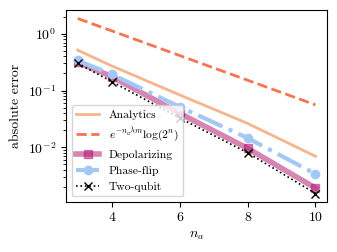

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pallet = sns.color_palette("rocket")
import matplotlib
font = {'family' : 'serif',
         'serif':  'cmr10'
         }

matplotlib.rc('font', **font)

matplotlib.rcParams["mathtext.fontset"] ='cm'

######################### Load data ######################################

res_depol_lownoise = np.load("Entropy_depolarizing_Seed_2_N100_FixedE_0p05.npy")
res_multi = np.load("Entropy_depol_Seed_1_FixedE_0p05_lowtime_2q.npy") 
res_phase_lownoise = np.load("Entropy_phaseflip_Seed_1_N100_FixedE_0p05.npy")

####################### Rescale ######################################

res_scaled_multi = res_multi
res_scaled_phase_lownoise = res_phase_lownoise
res_scaled_lownoise = res_depol_lownoise
na_arr = np.array([3.,4.,6.,8.,10.,12.])

for i,n in enumerate(na_arr):
    res_scaled_multi[i,:] =(12./n)* res_multi[i,:]
    res_scaled_phase_lownoise[i,:] =(12./n)* res_phase_lownoise[i,:]
    res_scaled_lownoise[i,:] = (12/n) * res_depol_lownoise[i,:]

####################### Plotting ######################################
fig, ax = plt.subplots(figsize=(3.375, 2.5))
def analytics_full(na):
    # derived in the mathematica notebook
    t = 10
    N = 12
    p = 0.05
    return ( -1 * np.log( ( 2. )**( -1 * N ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) ) + ( ( 2. )**( -1 * N ) * np.log( ( 2. )**( -1 * N ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) ) + ( ( np.e )**( -1 * N * p * t ) * np.log( ( 2. )**( -1 * N ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) ) + ( -1 * ( 2. )**( -1 * N ) * ( np.e )**( -1 * N * p * t ) * np.log( ( 2. )**( -1 * N ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) ) + ( N * float( na )**( -1 ) * np.log( ( 2. )**( -1 * na ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) ) + ( -1 * ( 2. )**( -1 * na ) * N * ( na )**( -1 ) * np.log( ( 2. )**( -1 * na ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) ) + ( -1 * ( np.e )**( -1 * na * p * t ) * N * ( na )**( -1 ) * np.log( ( 2. )**( -1 * na ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) ) + ( ( 2. )**( -1 * na ) * ( np.e )**( -1 * na * p * t ) * N * ( na )**( -1 ) * np.log( ( 2. )**( -1 * na ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) ) + ( -1 * ( 2. )**( -1 * N ) * np.log( ( ( np.e )**( -1 * N * p * t ) + ( 2. )**( -1 * N ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) ) ) + ( -1 * ( np.e )**( -1 * N * p * t ) * np.log( ( ( np.e )**( -1 * N * p * t ) + ( 2. )**( -1 * N ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) ) ) + ( ( 2. )**( -1 * N ) * ( np.e )**( -1 * N * p * t ) * np.log( ( ( np.e )**( -1 * N * p * t ) + ( 2 )**( -1 * N ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) ) ) + ( ( 2. )**( -1 * na ) * N * ( na )**( -1 ) * np.log( ( ( np.e )**( -1 * na * p * t ) + ( 2 )**( -1 * na ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) ) ) + ( ( np.e )**( -1 * na * p * t ) * N * float( na )**( -1 ) * np.log( ( ( np.e )**( -1 * na * p * t ) + ( 2. )**( -1 * na ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) ) ) + -1 * ( 2. )**( -1 * na ) * ( np.e )**( -1 * na * p * t ) * N * float( na )**( -1 ) * np.log( ( ( np.e )**( -1 * na * p * t ) + ( 2. )**( -1 * na ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) )

def analyticsNew(na):
    t = 10
    N = 12
    p = 0.05 #
    return ( np.e )**( -1 * na * p * t ) * N * np.log( 2. ) 

list_anal = []
for a in np.array(na_arr[:-1]): 
    list_anal.append(analytics_full(float(a)))
ax.semilogy(na_arr[:-1],list_anal,label =  r"Analytics",color = pallet[5],linewidth = 2)
ax.semilogy(na_arr[:-1],analyticsNew(na_arr[:-1]),label =  r"$e^{-n_a \lambda  m} \log(2^n)$",color = pallet[4],linewidth = 2,linestyle = "dashed")
ax.semilogy(na_arr[:-1],np.abs( np.real(np.average(res_scaled_lownoise[-1,:]))-np.real(np.average(res_scaled_lownoise,axis = 1))[:-1]),marker = "s",label = "Depolarizing",color = "#ad0e68",linewidth = 4, alpha = 0.5)
ax.semilogy(na_arr[:-1],np.abs( np.real(np.average(res_scaled_phase_lownoise[-1,:]))-np.real(np.average(res_scaled_phase_lownoise,axis = 1))[:-1]),marker = "o",label = "Phase-flip",color = "#a4c8f5",linestyle = "dashdot",linewidth = 3)
ax.semilogy(na_arr[:-1],np.abs( np.real(np.average(res_scaled_multi[-1,:]))-np.real(np.average(res_scaled_multi,axis = 1))[:-1]),marker = "x",label = "Two-qubit",color = "k",linestyle = "dotted",linewidth = 1.2)


ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel(r"$n_a$")
plt.ylabel("absolute error")
plt.legend(fontsize='small', handlelength=2,loc = "lower left")
plt.savefig("EntropyErrorScaling.pdf", bbox_inches='tight',

    #borderaxespad=0.4,    # Adjusting the padding on the border of the axes
    #borderpad=0.4,        # Adjusting the overall border padding
    #handletextpad=0.5,    # Adjusting the padding between the legend handle and text
    #columnspacing=0.5,    # Adjusting the spacing between columns (if multiple columns)
    )

## Relative error

/var/folders/qd/5q9cvk1x2lgcx1ddzjm2j60c0000gn/T/ipykernel_92448/1220786939.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(3.375, 2.5))


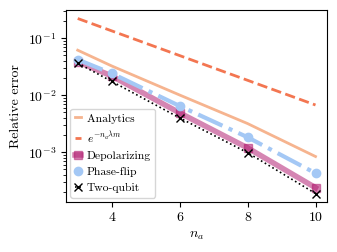

In [7]:
fig, ax = plt.subplots(figsize=(3.375, 2.5))
def analyticsfull(na,p = 0.05):
    #Full analytics from the mathematica notebook
    N = 12.
    t = 10.
    return ( 1 + -1 * N * ( na )**( -1 ) * ( ( -1 * ( 2. )**( -1 * N ) * ( -1 + ( 2. )**( N ) ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) * np.log( ( 2. )**( -1 * N ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) ) + ( -1 * ( np.e )**( -1 * N * p * t ) + -1 * ( 2. )**( -1 * N ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) ) * np.log( ( ( np.e )**( -1 * N * p * t ) + ( 2. )**( -1 * N ) * ( 1 + -1 * ( np.e )**( -1 * N * p * t ) ) ) ) ) )**( -1 ) * ( -1 * ( 2. )**( -1 * na ) * ( -1 + ( 2. )**( na ) ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) * np.log( ( 2. )**( -1 * na ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) ) + ( -1 * ( np.e )**( -1 * na * p * t ) + -1 * ( 2. )**( -1 * na ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) ) * np.log( ( ( np.e )**( -1 * na * p * t ) + ( 2. )**( -1 * na ) * ( 1 + -1 * ( np.e )**( -1 * na * p * t ) ) ) ) ) )

def analSuperSimple(na):
    p = 0.05
    N = 12.
    t = 10.
    return np.exp(-na * p * t) 


ax.semilogy(na_arr[:-1], analyticsfull(na_arr[:-1]) ,label =  r"Analytics ",color = pallet[5],linewidth = 2)
ax.semilogy(na_arr[:-1], analSuperSimple(na_arr[:-1]) ,label =  r"$e^{-n_a \lambda  m}$",color = pallet[4],linewidth = 2,linestyle = "dashed")

tweleve = np.real(np.average(res_scaled_lownoise[-1,:]))
ax.semilogy(na_arr[:-1],np.abs( np.real(np.average(res_scaled_lownoise[-1,:]))-np.real(np.average(res_scaled_lownoise,axis = 1))[:-1])/tweleve,marker = "s",label = "Depolarizing",color = "#ad0e68",linewidth = 4, alpha = 0.5)
ax.semilogy(na_arr[:-1],np.abs( np.real(np.average(res_scaled_phase_lownoise[-1,:]))-np.real(np.average(res_scaled_phase_lownoise,axis = 1))[:-1])/np.real(np.average(res_scaled_phase_lownoise[-1,:])),marker = "o",label = "Phase-flip",color = "#a4c8f5",linestyle = "dashdot",linewidth = 3)
ax.semilogy(na_arr[:-1],np.abs( np.real(np.average(res_scaled_multi[-1,:]))-np.real(np.average(res_scaled_multi,axis = 1))[:-1])/np.real(np.average(res_scaled_multi[-1,:])),marker = "x",label = "Two-qubit",color = "k",linestyle = "dotted",linewidth = 1.2)


ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel(r"$n_a$")
plt.ylabel("Relative error")
plt.legend(fontsize='small', 
handlelength=.5,
    borderaxespad=0.4,    # Adjusting the padding on the border of the axes
    borderpad=0.4,        # Adjusting the overall border padding
    handletextpad=0.5,    # Adjusting the padding between the legend handle and text
    columnspacing=0.5,    # Adjusting the spacing between columns (if multiple columns)
)
plt.savefig("EntropyErrorScaling_relative_2q.pdf", bbox_inches='tight')